# Res1D - Strategies for handling large files

In [1]:
import mikeio1d

All static network data is loaded into memory by default. Dynamic result data is only loaded when required.

In [2]:
res = mikeio1d.open("../tests/testdata/network.res1d")
loaded_time_steps = res.data.NumberOfTimeSteps
loaded_time_steps

0

Calling read() loads dynamic data for the entire network.

In [3]:
res.read()
loaded_time_steps = res.data.NumberOfTimeSteps
loaded_time_steps

110

All network dynamic data is loaded into memory regardless of how read() is called. In the future, it would nice to make this work lazily.

In [4]:
res = mikeio1d.open("../tests/testdata/network.res1d")
# this still reads all network data, but only creates a DataFrame with the requested data
res.nodes["1"].WaterLevel.read().head()

,WaterLevel:1
1994-08-07 16:35:00.000,195.052994
1994-08-07 16:36:01.870,195.052994
1994-08-07 16:37:07.560,195.052994
1994-08-07 16:38:55.828,195.052994
1994-08-07 16:39:55.828,195.052994


To avoid loading the entire network's dynamic data into memory, you can specify which IDs to load when opening the file.

In [5]:
res = mikeio1d.open("../tests/testdata/network.res1d", nodes=["1"], reaches=["100l1"])
res.nodes

<ResultNodes> (1)

In [6]:
res.reaches

<ResultReaches> (1)

In [7]:
res.read()

,WaterLevel:1,WaterLevel:100l1:0,WaterLevel:100l1:47.6827,Discharge:100l1:23.8414
1994-08-07 16:35:00.000,195.052994,195.441498,194.661499,0.000006
1994-08-07 16:36:01.870,195.052994,195.441498,194.661621,0.000006
1994-08-07 16:37:07.560,195.052994,195.441498,194.661728,0.000006
1994-08-07 16:38:55.828,195.052994,195.441498,194.661804,0.000006
1994-08-07 16:39:55.828,195.052994,195.441498,194.661972,0.000006
...,...,...,...,...
1994-08-07 18:30:07.967,195.119919,195.455109,194.689072,0.000588
1994-08-07 18:31:07.967,195.118607,195.455063,194.688934,0.000583
1994-08-07 18:32:07.967,195.117310,195.455002,194.688812,0.000579
1994-08-07 18:33:07.967,195.115753,195.453049,194.688354,0.000526


Similarly, you can also specify the time range to read.

In [8]:
start, end = "1994-08-07 18:30:07.967", "1994-08-07 18:33:07.967"
res = mikeio1d.open(
    "../tests/testdata/network.res1d", nodes=["1"], reaches=["100l1"], time=(start, end)
)
loaded_time_steps = res.data.NumberOfTimeSteps
loaded_time_steps

0

In [9]:
res.read()
loaded_time_steps = res.data.NumberOfTimeSteps
loaded_time_steps

4

In [10]:
res.read().head()

,WaterLevel:1,WaterLevel:100l1:0,WaterLevel:100l1:47.6827,Discharge:100l1:23.8414
1994-08-07 18:30:07.967,195.119919,195.455109,194.689072,0.000588
1994-08-07 18:31:07.967,195.118607,195.455063,194.688934,0.000583
1994-08-07 18:32:07.967,195.117310,195.455002,194.688812,0.000579
1994-08-07 18:33:07.967,195.115753,195.453049,194.688354,0.000526


It's also possible to load every 'nth' time step with the 'step_every' parameter.

(np.float64(8984.71875), np.float64(8984.743055555555))

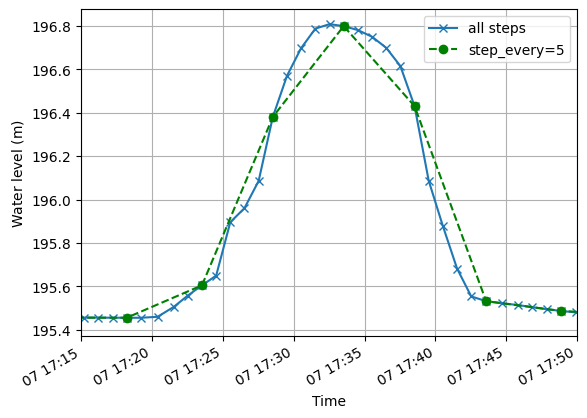

In [42]:
# First plot the full time series for a comparison
res = mikeio1d.open(
    "../tests/testdata/network.res1d", reaches=["100l1"]
)
ax = res.reaches['100l1'][0].WaterLevel.plot(linestyle='-', marker='x')

# Then plot with every 5th time step

res = mikeio1d.open(
    "../tests/testdata/network.res1d", reaches=["100l1"], step_every=5,
)
ax = res.reaches['100l1'][0].WaterLevel.plot(ax=ax, linestyle='--', marker='o', color='g')

ax.legend(["all steps", "step_every=5"])
ax.set_xlim("1994-08-07 17:15", "1994-08-07 17:50")

In [43]:
res.data.NumberOfTimeSteps

/home/ryan/mikeio1d/mikeio1d/res1d.py:602: FutureWarning: The 'data' parameter will be deprecated in 1.0. Use 'result_data' instead.
  warnings.warn(


22

Lastly you can also specify which quantities to include.

In [45]:
res = mikeio1d.open(
    "../tests/testdata/network.res1d", nodes=["1"], reaches=["100l1"], step_every=10, quantities=["Discharge"]
)
res.read()

,Discharge:100l1:23.8414
1994-08-07 16:35:00.000,0.000006
1994-08-07 16:45:55.828,0.000006
1994-08-07 16:58:12.888,0.001852
1994-08-07 17:08:12.888,0.000951
1994-08-07 17:18:12.888,0.000674
1994-08-07 17:28:31.543,0.099751
1994-08-07 17:38:31.543,0.056495
1994-08-07 17:48:52.376,0.006408
1994-08-07 18:00:56.369,0.001234
1994-08-07 18:13:18.518,0.000740
